# Document Clustering with Daily Kos

<img src="images/dailykos.png"/>

Document clustering, or text clustering, is a very popular application of clustering algorithms. A web search engine, like Google, often returns thousands of results for a simple query. For example, if you type the search term “jaguar” into Google, around 200 million results are returned. This makes it very difficult to browse or find relevant information, especially if the search term has multiple meanings. If we search for “jaguar”, we might be looking for information about the animal, the car, or the Jacksonville Jaguars football team.

Clustering methods can be used to automatically group search results into categories, making it easier to find relevant results. This method is used in the search engines PolyMeta and Helioid, as well as on FirstGov.gov, the official Web portal for the U.S. government. The two most common algorithms used for document clustering are Hierarchical and k-means.

In this problem, we’ll be clustering articles published on Daily Kos, an American political blog that publishes news and opinion articles written from a progressive point of view. Daily Kos was founded by Markos Moulitsas in 2002, and as of September 2014, the site had an average weekday traffic of hundreds of thousands of visits.

The file dailykos.csv contains data on 3,430 news articles or blogs that have been posted on Daily Kos. These articles were posted in 2004, leading up to the United States Presidential Election. The leading candidates were incumbent President George W. Bush (republican) and John Kerry (democratic). Foreign policy was a dominant topic of the election, specifically, the 2003 invasion of Iraq.

Each of the variables in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total). The set of words has been trimmed according to some of the techniques covered in the previous week on text analytics (punctuation has been removed, and stop words have been removed). For each document, the variable values are the number of times that word appeared in the document.

### Problem 1.1 - Hierarchical Clustering
Let's start by building a hierarchical clustering model. First, read the data set into R. Then, compute the distances (using method="euclidean"), and use hclust to build the model (using method="ward.D"). You should cluster on all of the variables.

**Running the dist function will probably take you a while. Why?**

In [1]:
# Load the dataset
dailykos = read.csv("data/dailykos.csv")

head(dailykos,3)

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,⋯,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [2]:
#str(dailykos)

In [3]:
# Hierarchical Cluster algorithm

kosDist = dist(dailykos, method="euclidean")

kosHierClust = hclust(kosDist, method="ward.D")

We have a lot of observations, so it takes a long time to compute the distance between each pair of observations. We have a lot of variables, so the distance computation is long.

### Problem 1.2 - Hierarchical Clustering
Plot the dendrogram of your hierarchical clustering model. Just looking at the dendrogram, **which of the following seem like good choices for the number of clusters?**

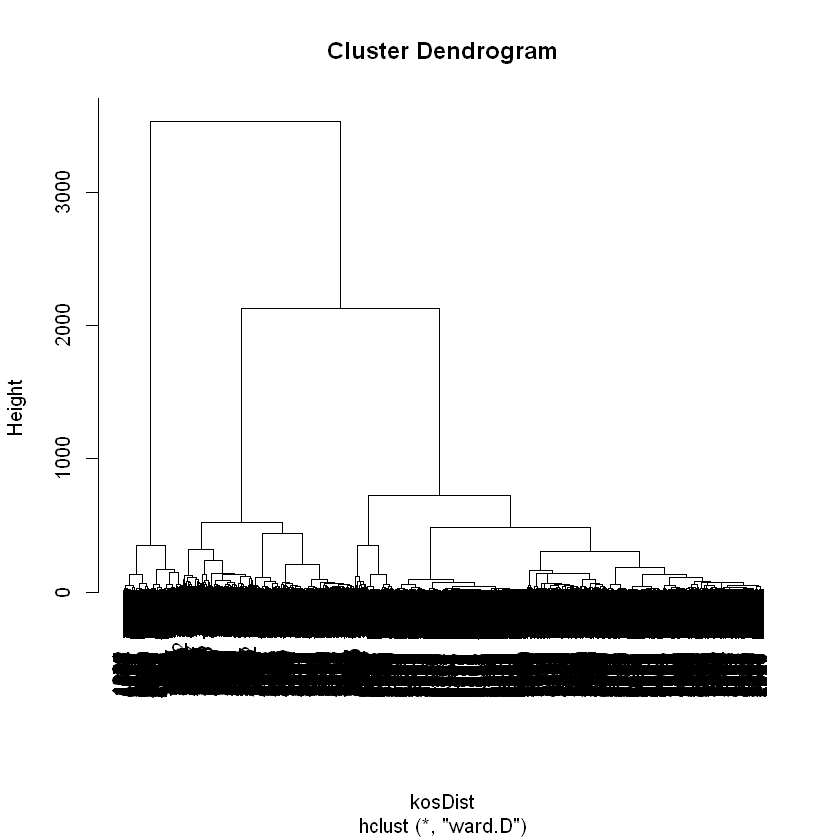

In [4]:
# Plots Dendrogram
plot(kosHierClust)

Answer: The choices 2 and 3 are good cluster choices according to the dendrogram, because there is a lot of space between the horizontal lines in the dendrogram in those cut off spots (draw a horizontal line across the dendrogram where it crosses 2 or 3 vertical lines).

### Problem 1.3 - Hierarchical Clustering
In this problem, we are trying to cluster news articles or blog posts into groups. This can be used to show readers categories to choose from when trying to decide what to read. Just thinking about this application, what are good choices for the number of clusters?

Answer: Thinking about the application, it is probably better to show the reader more categories than 2 or 3. These categories would probably be too broad to be useful. Seven or eight categories seems more reasonable.

### Problem 1.4 - Hierarchical Clustering
Let's pick 7 clusters. This number is reasonable according to the dendrogram, and also seems reasonable for the application. Use the cutree function to split your data into 7 clusters.

Now, we don't really want to run tapply on every single variable when we have over 1,000 different variables. Let's instead use the subset function to subset our data by cluster. Create 7 new datasets, each containing the observations from one of the clusters.

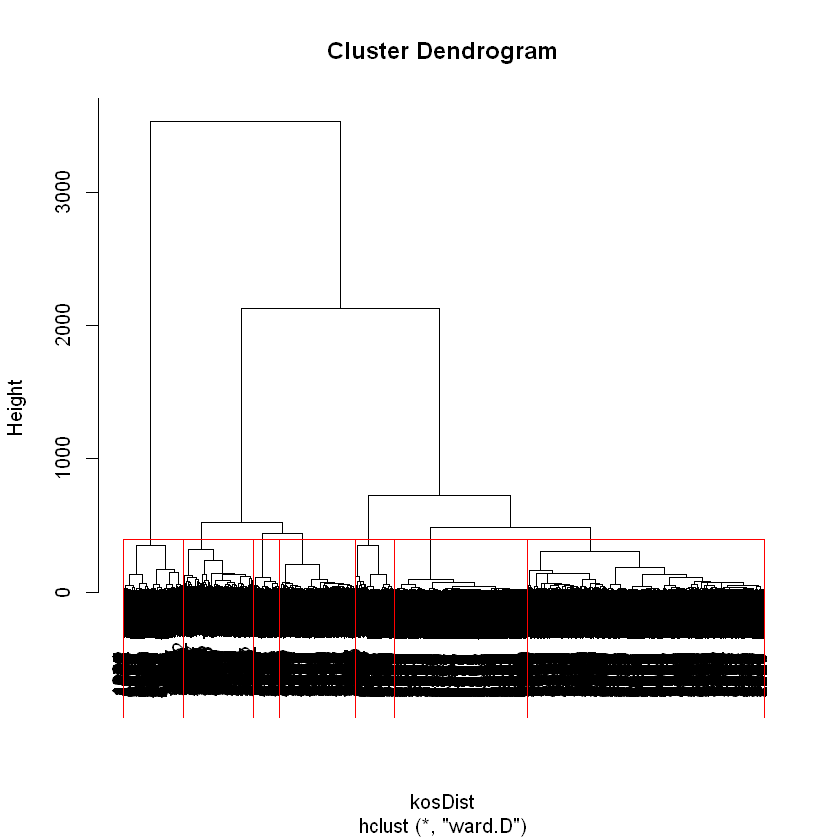

In [5]:
# Plots the dendrogram
plot(kosHierClust)

# Divides it into 7 clusters
rect.hclust(kosHierClust, k = 7, border = "red")

In [6]:
# Split the data into 7 clusters

hierGroups = cutree(kosHierClust, k = 7)

# Divides dataset into 7 different subsets

HierCluster1 = subset(dailykos, hierGroups == 1)

HierCluster2 = subset(dailykos, hierGroups == 2)

HierCluster3 = subset(dailykos, hierGroups == 3)

HierCluster4 = subset(dailykos, hierGroups == 4)

HierCluster5 = subset(dailykos, hierGroups == 5)

HierCluster6 = subset(dailykos, hierGroups == 6)

HierCluster7 = subset(dailykos, hierGroups == 7)

**How many observations are in cluster 3?**

In [7]:
table(hierGroups)

hierGroups
   1    2    3    4    5    6    7 
1266  321  374  139  407  714  209 

Answer: In the cluster 3 there is 374 observations.

**Which cluster has the most observations?**

Answer: Cluster 1, with 1266 observations.

**Which cluster has the fewest observations?**

Answer: Cluster 7, with 209 observations.

### Problem 1.5 - Hierarchical Clustering
Instead of looking at the average value in each variable individually, we'll just look at the top 6 words in each cluster. To do this for cluster 1, type the following in your R console (where "HierCluster1" should be replaced with the name of your first cluster subset):

    tail(sort(colMeans(HierCluster1)))

This computes the mean frequency values of each of the words in cluster 1, and then outputs the 6 words that occur the most frequently. The colMeans function computes the column (word) means, the sort function orders the words in increasing order of the mean values, and the tail function outputs the last 6 words listed, which are the ones with the largest column means.

**What is the most frequent word in this cluster, in terms of average value?**

In [8]:
# Sorts the words used in the cluster
z = tail(sort(colMeans(HierCluster1)))
z

state republican       poll   democrat      kerry       bush 
 0.7575039  0.7590837  0.9036335  0.9194313  1.0624013  1.7053712

Answer: Bush

### Problem 1.6 - Hierarchical Clustering
Now repeat the command given in the previous problem for each of the other clusters, and answer the following questions.

**Which words best describe cluster 2?**

In [9]:
# Sorts the words used in the cluster
b = tail(sort(colMeans(HierCluster2)))
b

bush  democrat challenge      vote      poll  november 
 2.847352  2.850467  4.096573  4.398754  4.847352 10.339564

Answer: November

**Which cluster could best be described as the cluster related to the Iraq war?**

In [10]:
# Sorts the words used in the others clusters

c = tail(sort(colMeans(HierCluster3)))
c

d = tail(sort(colMeans(HierCluster4)))
d

e = tail(sort(colMeans(HierCluster5)))
e

f = tail(sort(colMeans(HierCluster6)))
f

g = tail(sort(colMeans(HierCluster7)))
g

elect    parties      state republican   democrat       bush 
  1.647059   1.665775   2.320856   2.524064   3.823529   4.406417

campaign    voter presided     poll     bush    kerry 
1.431655 1.539568 1.625899 3.589928 7.834532 8.438849

american       presided administration            war           iraq 
      1.090909       1.120393       1.230958       1.776413       2.427518 
          bush 
      3.941032

race      bush     kerry     elect  democrat      poll 
0.4579832 0.4887955 0.5168067 0.5350140 0.5644258 0.5812325

democrat    clark   edward     poll    kerry     dean 
2.148325 2.497608 2.607656 2.765550 3.952153 5.803828

Answer: Cluster 5 cover more war in Iraq

In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). **Given this information, which cluster best corresponds to the democratic party?**

Answer: Cluster 7, with the most common words: dean, kerry, poll, and edward.

### Problem 2.1 - K-Means Clustering
Now, run k-means clustering, setting the seed to 1000 right before you run the kmeans function. Again, pick the number of clusters equal to 7. You don't need to add the iters.max argument.

Subset your data into the 7 clusters (7 new datasets) by using the "cluster" variable of your kmeans output.

In [11]:
# K-means algorithm

set.seed(1000)

kmc = kmeans(dailykos, centers=7)

In [12]:
# Divides the dataset into 7 different subsets for each cluster

KmeansCluster1 = subset(dailykos, kmc$cluster == 1)

KmeansCluster2 = subset(dailykos, kmc$cluster == 2)

KmeansCluster3 = subset(dailykos, kmc$cluster == 3)

KmeansCluster4 = subset(dailykos, kmc$cluster == 4)

KmeansCluster5 = subset(dailykos, kmc$cluster == 5)

KmeansCluster6 = subset(dailykos, kmc$cluster == 6)

KmeansCluster7 = subset(dailykos, kmc$cluster == 7)

**How many observations are in Cluster 3?**

In [13]:
# Outputs the number of row 
nrow(KmeansCluster3)

[1] 300

**Which cluster has the most observations?**

In [14]:
paste("# Observations Cluster 1:", nrow(KmeansCluster1))
paste("# Observations Cluster 2:", nrow(KmeansCluster2))
paste("# Observations Cluster 3:", nrow(KmeansCluster3))
paste("# Observations Cluster 4:", nrow(KmeansCluster4))
paste("# Observations Cluster 5:", nrow(KmeansCluster5))
paste("# Observations Cluster 6:", nrow(KmeansCluster6))
paste("# Observations Cluster 7:", nrow(KmeansCluster7))

[1] "# Observations Cluster 1: 150"

[1] "# Observations Cluster 2: 329"

[1] "# Observations Cluster 3: 300"

[1] "# Observations Cluster 4: 2027"

[1] "# Observations Cluster 5: 144"

[1] "# Observations Cluster 6: 275"

[1] "# Observations Cluster 7: 205"

Answer: Cluster 4, with 2027 observations.

**Which cluster has the fewest number of observations?**

Answer: Cluster 5, with 144 observations.

### Problem 2.2 - K-Means Clustering
Now, output the six most frequent words in each cluster, like we did in the previous problem, for each of the k-means clusters.

**Which k-means cluster best corresponds to the Iraq War?**

In [15]:
# Sorts the words used in each clusters

a = tail(sort(colMeans(KmeansCluster1)))
b = tail(sort(colMeans(KmeansCluster2)))
c = tail(sort(colMeans(KmeansCluster3)))
d = tail(sort(colMeans(KmeansCluster4)))
e = tail(sort(colMeans(KmeansCluster5)))
f = tail(sort(colMeans(KmeansCluster6)))
g = tail(sort(colMeans(KmeansCluster7)))

paste("Most frequent words in Cluster 1:")
a
paste("Most frequent words in Cluster 2:")
b
paste("Most frequent words in Cluster 3:")
c
paste("Most frequent words in Cluster 4:")
d
paste("Most frequent words in Cluster 5:")
e
paste("Most frequent words in Cluster 6:")
f
paste("Most frequent words in Cluster 7:")
g

[1] "Most frequent words in Cluster 1:"

time           iraq          kerry administration       presided 
      1.586667       1.640000       1.653333       2.620000       2.726667 
          bush 
     11.333333

[1] "Most frequent words in Cluster 2:"

democrat      bush challenge      vote      poll  november 
 2.899696  2.960486  4.121581  4.446809  4.872340 10.370821

[1] "Most frequent words in Cluster 3:"

voter presided campaign     poll     bush    kerry 
1.326667 1.336667 1.403333 2.816667 5.963333 6.613333

[1] "Most frequent words in Cluster 4:"

republican      elect      kerry       poll   democrat       bush 
 0.5772077  0.5786877  0.6581154  0.7380365  0.7409965  1.1588555

[1] "Most frequent words in Cluster 5:"

primaries  democrat    edward     clark     kerry      dean 
 2.333333  2.708333  2.826389  3.083333  5.041667  8.236111

[1] "Most frequent words in Cluster 6:"

administration          iraqi       american           bush            war 
      1.396364       1.621818       1.694545       2.607273       3.036364 
          iraq 
      4.094545

[1] "Most frequent words in Cluster 7:"

race     senate      state    parties republican   democrat 
  2.341463   2.409756   2.995122   3.243902   4.200000   6.185366

Answer: Cluster 6.

**Which k-means cluster best corresponds to the democratic party? (Remember that we are looking for the names of the key democratic party leaders.)**

Answer: Cluster 5.

### Problem 2.3 - K-Means Clustering
For the rest of this problem, we'll ask you to compare how observations were assigned to clusters in the two different methods. Use the table function to compare the cluster assignment of hierarchical clustering to the cluster assignment of k-means clustering.

In [16]:
# Tabulates the hierarchical cluster group vs the k-means cluster group 
cp = table(hierGroups, kmc$cluster)
cp

          
hierGroups    1    2    3    4    5    6    7
         1    3    0  110 1026   11   62   54
         2    0  320    1    0    0    0    0
         3   85    8   24   67    9   42  139
         4   10    0  123    0    5    0    1
         5   52    1   34  141    0  171    8
         6    0    0    0  710    2    0    2
         7    0    0    8   83  117    0    1

                      K-Means
                      1 ... 7
                  1
    Hierarchical ...
                  7

**Which Hierarchical Cluster best corresponds to K-Means Cluster 2?**

Answer: Cluster 2 (Hierarchical) with Cluster 2 (K-Means). (320/329 K-Means in 320/321 Hierarchical)

In [17]:
cp[2,2]/sum(cp[1:7,2])

[1] 0.9726444

In [18]:
cp[2,2]/sum(cp[2,1:7])

[1] 0.9968847

### Problem 2.4 - K-Means Clustering
**Which Hierarchical Cluster best corresponds to K-Means Cluster 3?**

Answer: Cluster 4 (Hierarchical) with Cluster 3 (K-Means)

In [19]:
cp[4,3]/sum(cp[1:7,3])

[1] 0.41

In [20]:
cp[4,3]/sum(cp[4,1:7])

[1] 0.8848921

### Problem 2.5 - K-Means Clustering
**Which Hierarchical Cluster best corresponds to K-Means Cluster 7?**

Answer: Cluster 3 (Hierarchical) with Cluster 7 (K-Means), but not exactly.

In [21]:
cp[3,7]/sum(cp[1:7,7])

[1] 0.6780488

In [22]:
cp[3,7]/sum(cp[3,1:7])

[1] 0.3716578

## Problem 2.6 - K-Means Clustering
**Which Hierarchical Cluster best corresponds to K-Means Cluster 6?**

Answer: Cluster 5 (Hierarchical) with Cluster 6 (K-Means)

In [23]:
cp[5,6]/sum(cp[1:7,6])

[1] 0.6218182

In [24]:
cp[5,6]/sum(cp[5,1:7])

[1] 0.4201474